In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
pip install scikit-learn==1.3.0

In [5]:
data = pd.read_csv('Iris.csv')

In [6]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
data = data.drop(columns = ['Id'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

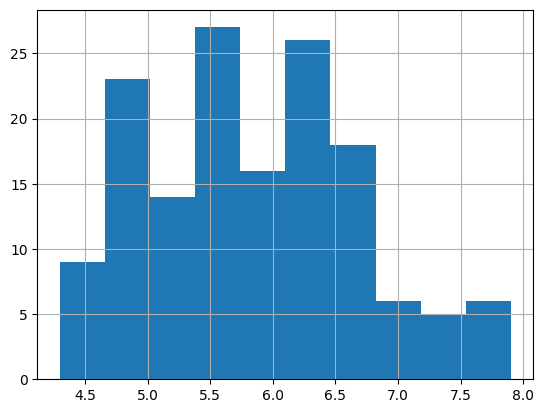

In [18]:
data['SepalLengthCm'].hist()

<Axes: >

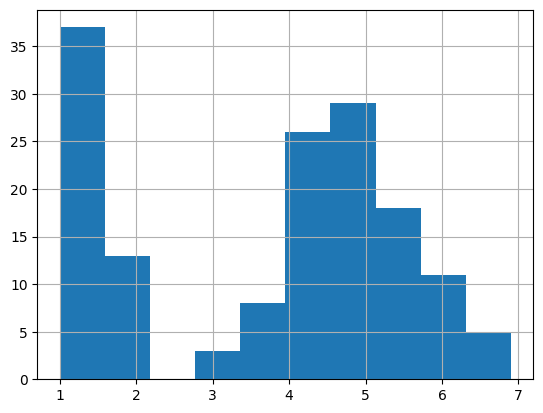

In [19]:
data['PetalLengthCm'].hist()

In [22]:
colors = ['red','orange','blue']
species = ['viginica','versicolor','setosa']

In [28]:
for i in range(3):
  x = data[data['Species'] == species[i]]
  plt.scatter(x['Sepal.Length'] , x['Sepal.Width'] , c = colors[i] , label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

KeyError: 'Sepal.Length'

Correlation

In [30]:
corr = data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

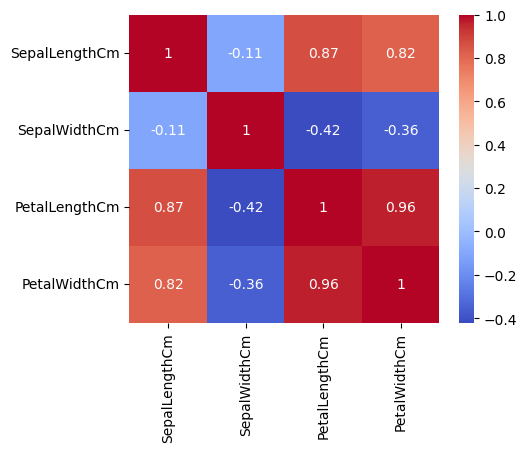

In [33]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [42]:
X = data.drop(columns=['Species'])
Y = data['Species']
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3)

In [44]:
model = LogisticRegression()
model.fit(x_train , y_train)
print("Accuracy:" , model.score(x_test , y_test)*100)

Accuracy: 93.33333333333333


Decision Tree

In [45]:
model = DecisionTreeClassifier()
model.fit(x_train.values , y_train.values)
print("Decision Tree Accuracy:",model.score(x_test,y_test)*100)

Decision Tree Accuracy: 93.33333333333333


K-Neighbours

In [46]:
model = KNeighborsClassifier()
model.fit(x_train.values , y_train.values)
print("K-Neighbours Accuracy:",model.score(x_test,y_test)*100)

K-Neighbours Accuracy: 93.33333333333333


In [47]:
file_name = 'updated_file.csv'
try:
  with open(file_name , 'wb') as file:
      pickle.dump(model , file)
  print("Saved Successfully")
except Exception as e:
  print("Error While Saving")

Saved Successfully


Prediction of the Flower

In [49]:
load_model = pickle.load(open(file_name , 'rb'))

In [50]:
load_model.predict([[4,2,5,1]])

array(['Iris-versicolor'], dtype=object)

In [51]:
load_model.predict([[4,2,2,3]])

array(['Iris-versicolor'], dtype=object)

In [52]:
load_model.predict([[1,3,2,1]])

array(['Iris-setosa'], dtype=object)